<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/ML_Intro_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1. Loading Dataset
# Set the dataset columns names to ['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab'].
# Print the size of the data set.
# Print the first 10 observations of your data set

df = pd.read_csv('/content/diabetes.csv')
df.columns = ['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab']

In [23]:
df.shape

(767, 9)

In [ ]:
df.size

In [ ]:
print(df.head(10))

In [ ]:
# Step 2: Data type and description for each attribute
# Print the data type for each attribute using dtypes method of a pandas data frame

print(df.dtypes)

In [ ]:
# Descriptive statistics can give you great insight into the properties of each attribute.
# Often you can create more summaries than you have time to review.
# The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute.
# They are: Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value.

df.describe()

In [50]:
# On classication problems you need to know how balanced the class values are.
# Highly imbalanced problems are common and may need special handling in the data preparation stage of your project.
# You can quickly get an idea of the distribution of the OnDiab attribute in Pandas.
# Group your data by OnDiab attribute and use the size method to count the number of different values of class attribute.

df.groupby('OnDiab').size()

,0
OnDiab,
0,500
1,267


In [22]:
np.unique(df['OnDiab'], return_counts=True)

(array([0, 1]), array([500, 267]))

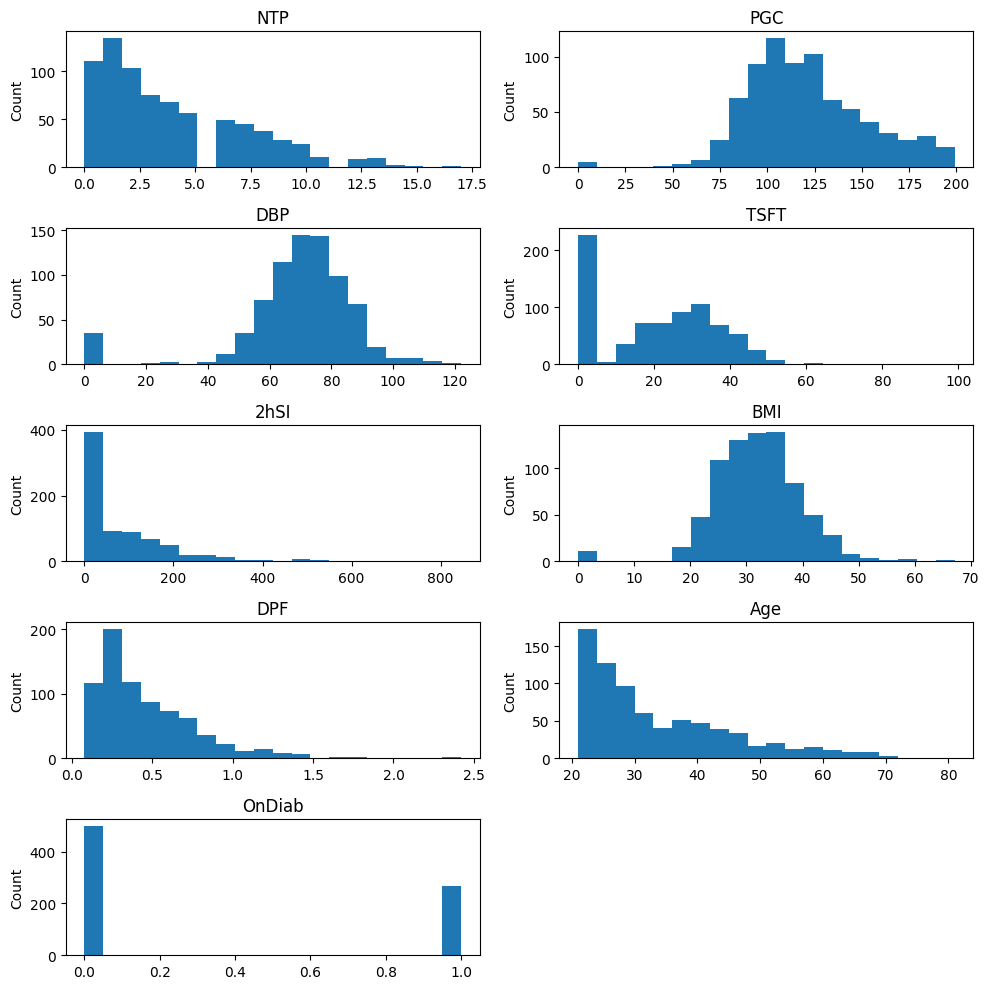

In [28]:
# Step 3: Draw the histogram of your data attributes.
# A fast way to get an idea of the distribution of each attribute is to look at histograms.
# Histograms group data into bins and provide you a count of the number of observations in each bin.
# From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution.
# It can also help you see possible outliers.
# Use hist() method of pandas data frame to plot the histograms.

fig, axes = plt.subplots(5, 2, figsize=(10,10))

for i, ax in enumerate(axes.ravel()):
  if i > 8:
    ax.set_visible(False)
    continue
  col = df.columns[i]
  ax.hist(df.loc[:, col], bins = 20)
  ax.set_title(col)
  ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [36]:
# Step 4: Running a Classifier
# Separate your dataset into feature set X and target variable y. Your target variable is OnDiab.
# Split your dataset into train and test datasets, keep the test dataset size as 0.25 using test_size parameter of train_test_split.
# Set the random seed top 7 using random_state parameter of train_test_split. Make a stratified split.
# Train KNearestNeighbor classifer on your train dataset and print the score on the the test dataset. Set number of neighbors to 5.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('OnDiab', axis=1)
y = df['OnDiab']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7, stratify = y)

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
knn.score(X_test, y_test)

0.7135416666666666

In [ ]:
# Step 5 : Grid Search
# Import GridSearchCV from sklearn.model_selection
# Split your data into train and test datasets
# For neighbors=1 to 30, compute GridSearchCV for train dataset with kfold=10.
# Print the best cross validation score
# Print the best parameter
# Print the test score

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7, stratify = y)
my_param_grid = {'n_neighbors': np.arange(1, 31)}
my_cv = KFold(n_splits = 10)
my_grid = GridSearchCV(KNeighborsClassifier(), param_grid = my_param_grid, cv = my_cv)

In [ ]:
my_grid.fit(X_train, y_train)

In [44]:
my_grid.best_score_

np.float64(0.733696309739867)

In [45]:
my_grid.best_params_

{'n_neighbors': np.int64(8)}

In [46]:
my_grid.score(X_test, y_test)

0.734375